# Problem Statement

An understanding of the housing market is important for homeowners, buyers, and real estate professionals. The goal of this project is to analyze the Ames Housing Dataset, and predict house prices in Ames, Iowa using machine learning model to understand elements that influence house prices in this area of the country. Features such as overall quality, living area, basement size, and more, are examined to develop a predictive model that accurately estimates house prices. 

Predicting house prices is important in the real estate industry. Accurate valuations is important for both buyers and sellers to make informed decisions. Machine learning models offers a good approach to analyze housing market data, and predict a reliable price estimates.


# Data Collection

In [1]:
# imort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from feature_engine.outliers import OutlierTrimmer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [2]:
# loading data
ames_housing = pd.read_csv("./datasets/train.csv")
ames_housing.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,532,1612,526352080,20,RL,85.0,10667,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2007,WD,167300
1,415,2045,904100100,70,RL,107.0,12888,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2007,WD,219000
2,273,1962,535451110,20,RL,60.0,7200,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,129000
3,1460,229,905109130,60,RL,80.0,14000,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2010,WD,328000
4,250,1105,528363020,60,RL,NaN,11929,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2008,WD,290000


# Data Cleaning and EDA

In [3]:
ames_housing.shape

(1538, 82)

In [4]:
ames_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1538 non-null   int64  
 1   Id               1538 non-null   int64  
 2   PID              1538 non-null   int64  
 3   MS SubClass      1538 non-null   int64  
 4   MS Zoning        1538 non-null   object 
 5   Lot Frontage     1285 non-null   float64
 6   Lot Area         1538 non-null   int64  
 7   Street           1538 non-null   object 
 8   Alley            111 non-null    object 
 9   Lot Shape        1538 non-null   object 
 10  Land Contour     1538 non-null   object 
 11  Utilities        1538 non-null   object 
 12  Lot Config       1538 non-null   object 
 13  Land Slope       1538 non-null   object 
 14  Neighborhood     1538 non-null   object 
 15  Condition 1      1538 non-null   object 
 16  Condition 2      1538 non-null   object 
 17  Bldg Type     

In [5]:
ames_housing.select_dtypes(include="number").corr()['SalePrice'].sort_values(ascending=False) #view correlation of features with target

SalePrice          1.000000
Overall Qual       0.795815
Gr Liv Area        0.691599
Garage Cars        0.649464
Garage Area        0.642596
Total Bsmt SF      0.613353
1st Flr SF         0.600088
Year Built         0.561116
Year Remod/Add     0.546412
Full Bath          0.534629
Mas Vnr Area       0.525619
TotRms AbvGrd      0.523055
Garage Yr Blt      0.521041
Fireplaces         0.478415
BsmtFin SF 1       0.424945
Lot Area           0.339062
Open Porch SF      0.333320
Lot Frontage       0.318364
Wood Deck SF       0.315844
Bsmt Full Bath     0.296774
Half Bath          0.283577
2nd Flr SF         0.258613
Bsmt Unf SF        0.169694
Screen Porch       0.148506
Bedroom AbvGr      0.137310
Mo Sold            0.043508
3Ssn Porch         0.039846
BsmtFin SF 2       0.025028
Unnamed: 0         0.017101
Pool Area          0.009242
Yr Sold           -0.006141
Misc Val          -0.007364
Low Qual Fin SF   -0.035269
Bsmt Half Bath    -0.036941
Id                -0.061303
MS SubClass       -0

**Selected most of the 8 numeric features with correlation >= 0.5, and randomly 2 categorical features '`Central Air`' and '`Street`', and "`'Unnamed: 0'`" which will be drop before training the model**

In [6]:
columns = ['Unnamed: 0', 'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'Street', '1st Flr SF', 'Year Built', 'Full Bath', 'SalePrice']

In [7]:
ames_housing = ames_housing[columns]

In [8]:
ames_housing.head()

,Unnamed: 0,Overall Qual,Overall Cond,Gr Liv Area,Central Air,Total Bsmt SF,Street,1st Flr SF,Year Built,Full Bath,SalePrice
0,532,6,6,1587,Y,1587.0,Pave,1587,1971,2,167300
1,415,7,8,2267,Y,1005.0,Pave,1262,1937,1,219000
2,273,5,8,864,Y,864.0,Pave,864,1950,1,129000
3,1460,7,5,2260,Y,1306.0,Pave,1306,1996,2,328000
4,250,8,7,2501,Y,1242.0,Pave,1251,1995,2,290000


In [9]:
ames_housing.shape

(1538, 11)

In [10]:
# categorical features values
for column in ames_housing.columns:
    if ames_housing[column].dtype == 'object':
        unique_values = ames_housing[column].unique()
        print(f"{column}: {unique_values.tolist()}")

Central Air: ['Y', 'N']
Street: ['Pave', 'Grvl']


In [11]:
ames_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1538 non-null   int64  
 1   Overall Qual   1538 non-null   int64  
 2   Overall Cond   1538 non-null   int64  
 3   Gr Liv Area    1538 non-null   int64  
 4   Central Air    1538 non-null   object 
 5   Total Bsmt SF  1537 non-null   float64
 6   Street         1538 non-null   object 
 7   1st Flr SF     1538 non-null   int64  
 8   Year Built     1538 non-null   int64  
 9   Full Bath      1538 non-null   int64  
 10  SalePrice      1538 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 132.3+ KB


**One missing value in the '`Total Bsmt SF`' column, that will be imputed using KNNImputer**

In [12]:
ames_housing[ames_housing["Total Bsmt SF"].isnull()]

,Unnamed: 0,Overall Qual,Overall Cond,Gr Liv Area,Central Air,Total Bsmt SF,Street,1st Flr SF,Year Built,Full Bath,SalePrice
1195,1327,4,7,896,Y,NaN,Pave,896,1946,1,79000


In [13]:
# impute missing values
imputer = KNNImputer(n_neighbors=5, weights="distance")
column_to_impute = "Total Bsmt SF"
ames_housing[column_to_impute] = imputer.fit_transform(ames_housing[[column_to_impute]])

In [14]:
ames_housing[ames_housing["Unnamed: 0"]==1327]

,Unnamed: 0,Overall Qual,Overall Cond,Gr Liv Area,Central Air,Total Bsmt SF,Street,1st Flr SF,Year Built,Full Bath,SalePrice
1195,1327,4,7,896,Y,1057.919323,Pave,896,1946,1,79000


In [15]:
ames_housing.isnull().sum()

Unnamed: 0       0
Overall Qual     0
Overall Cond     0
Gr Liv Area      0
Central Air      0
Total Bsmt SF    0
Street           0
1st Flr SF       0
Year Built       0
Full Bath        0
SalePrice        0
dtype: int64

In [16]:
ames_housing.describe() # summary stats

,Unnamed: 0,Overall Qual,Overall Cond,Gr Liv Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,SalePrice
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,1024.970741,6.109883,5.559818,1497.337451,1057.919323,1161.884265,1971.860858,1.572172,181061.993498
std,588.860047,1.428502,1.100363,507.433249,454.578136,404.390533,30.173843,0.553271,79552.718835
min,0.000000,1.000000,1.000000,334.000000,0.000000,334.000000,1872.000000,0.000000,13100.000000
25%,522.250000,5.000000,5.000000,1126.500000,793.250000,874.000000,1954.000000,1.000000,129925.000000
50%,1022.000000,6.000000,5.000000,1441.000000,994.000000,1092.000000,1975.000000,2.000000,162250.000000
75%,1528.750000,7.000000,6.000000,1721.000000,1311.750000,1398.000000,2001.000000,2.000000,213000.000000
max,2050.000000,10.000000,9.000000,5642.000000,6110.000000,5095.000000,2010.000000,4.000000,611657.000000


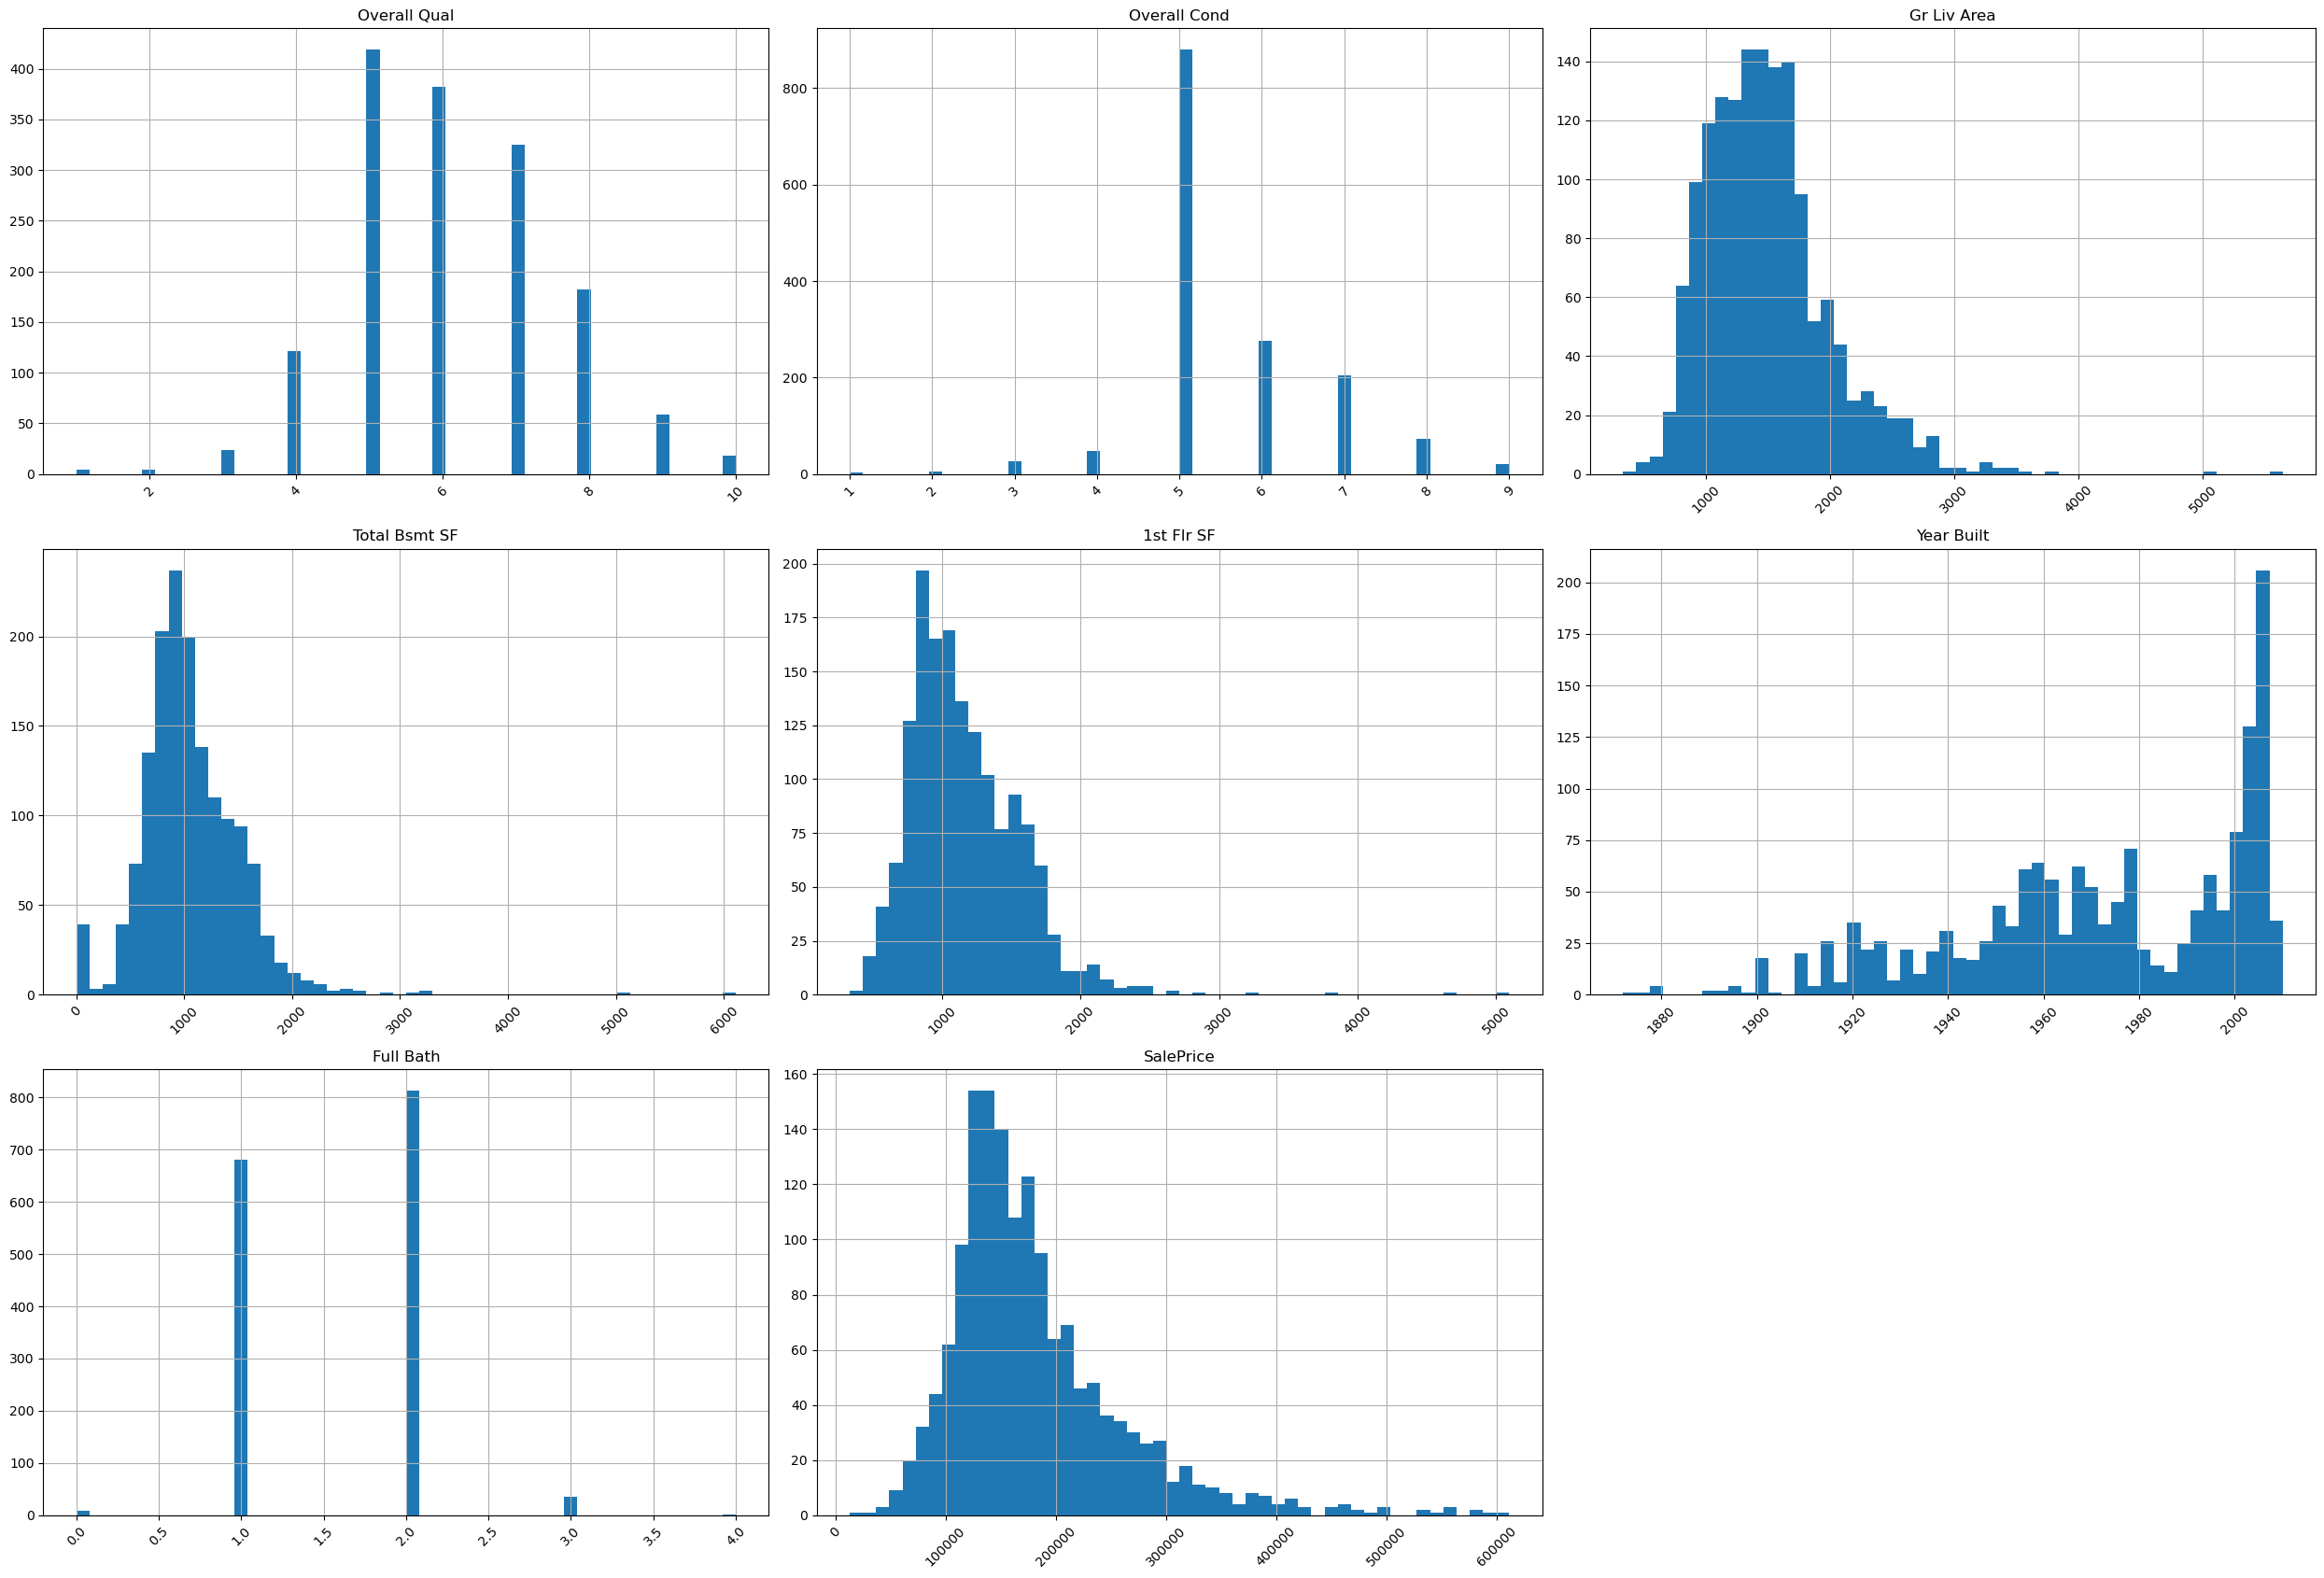

In [17]:
# distributions of features
axes = ames_housing.drop(columns="Unnamed: 0").hist(bins=50, figsize=(25,17))

for ax in axes.flatten():
    ax.tick_params(axis="x", rotation=45)
    ax.figure.tight_layout();

In [18]:
skewness = ames_housing.drop(columns=['Unnamed: 0']).select_dtypes(include="number").skew()

print(skewness)
print("========================================================================")
# Conclude based on skewness values
for column, skew_val in skewness.items():
    if skew_val > 0:
        print(f"The skewness of column '{column}' is {skew_val:.3f}: right-skewed.")
    elif skew_val < 0:
        print(f"The skewness of column '{column}' is {skew_val:.3f}: left-skewed.")
    else:
        print(f"The skewness of column '{column}' is {skew_val:.3f}: symmetric.")

Overall Qual     0.156225
Overall Cond     0.617917
Gr Liv Area      1.404508
Total Bsmt SF    1.732849
1st Flr SF       1.855983
Year Built      -0.637051
Full Bath        0.093488
SalePrice        1.675145
dtype: float64
The skewness of column 'Overall Qual' is 0.156: right-skewed.
The skewness of column 'Overall Cond' is 0.618: right-skewed.
The skewness of column 'Gr Liv Area' is 1.405: right-skewed.
The skewness of column 'Total Bsmt SF' is 1.733: right-skewed.
The skewness of column '1st Flr SF' is 1.856: right-skewed.
The skewness of column 'Year Built' is -0.637: left-skewed.
The skewness of column 'Full Bath' is 0.093: right-skewed.
The skewness of column 'SalePrice' is 1.675: right-skewed.


- The distributions  of the following features are **right-skewed**: '`Overall Qual`', '`Overall Cond`', '`Gr Liv Area`', '`Total Bsmt SF`', '`1st Flr SF`', '`Full Bath`'
- The distribution  of the following feature is **left-skewed**: '`Year Built`'
- The distribution  of the target is **left-skewed**: '`SalePrice`'
  
**There is no symmmetric distribution in the dataset**

**Visualize pairwise relationships between variables (features and target)**

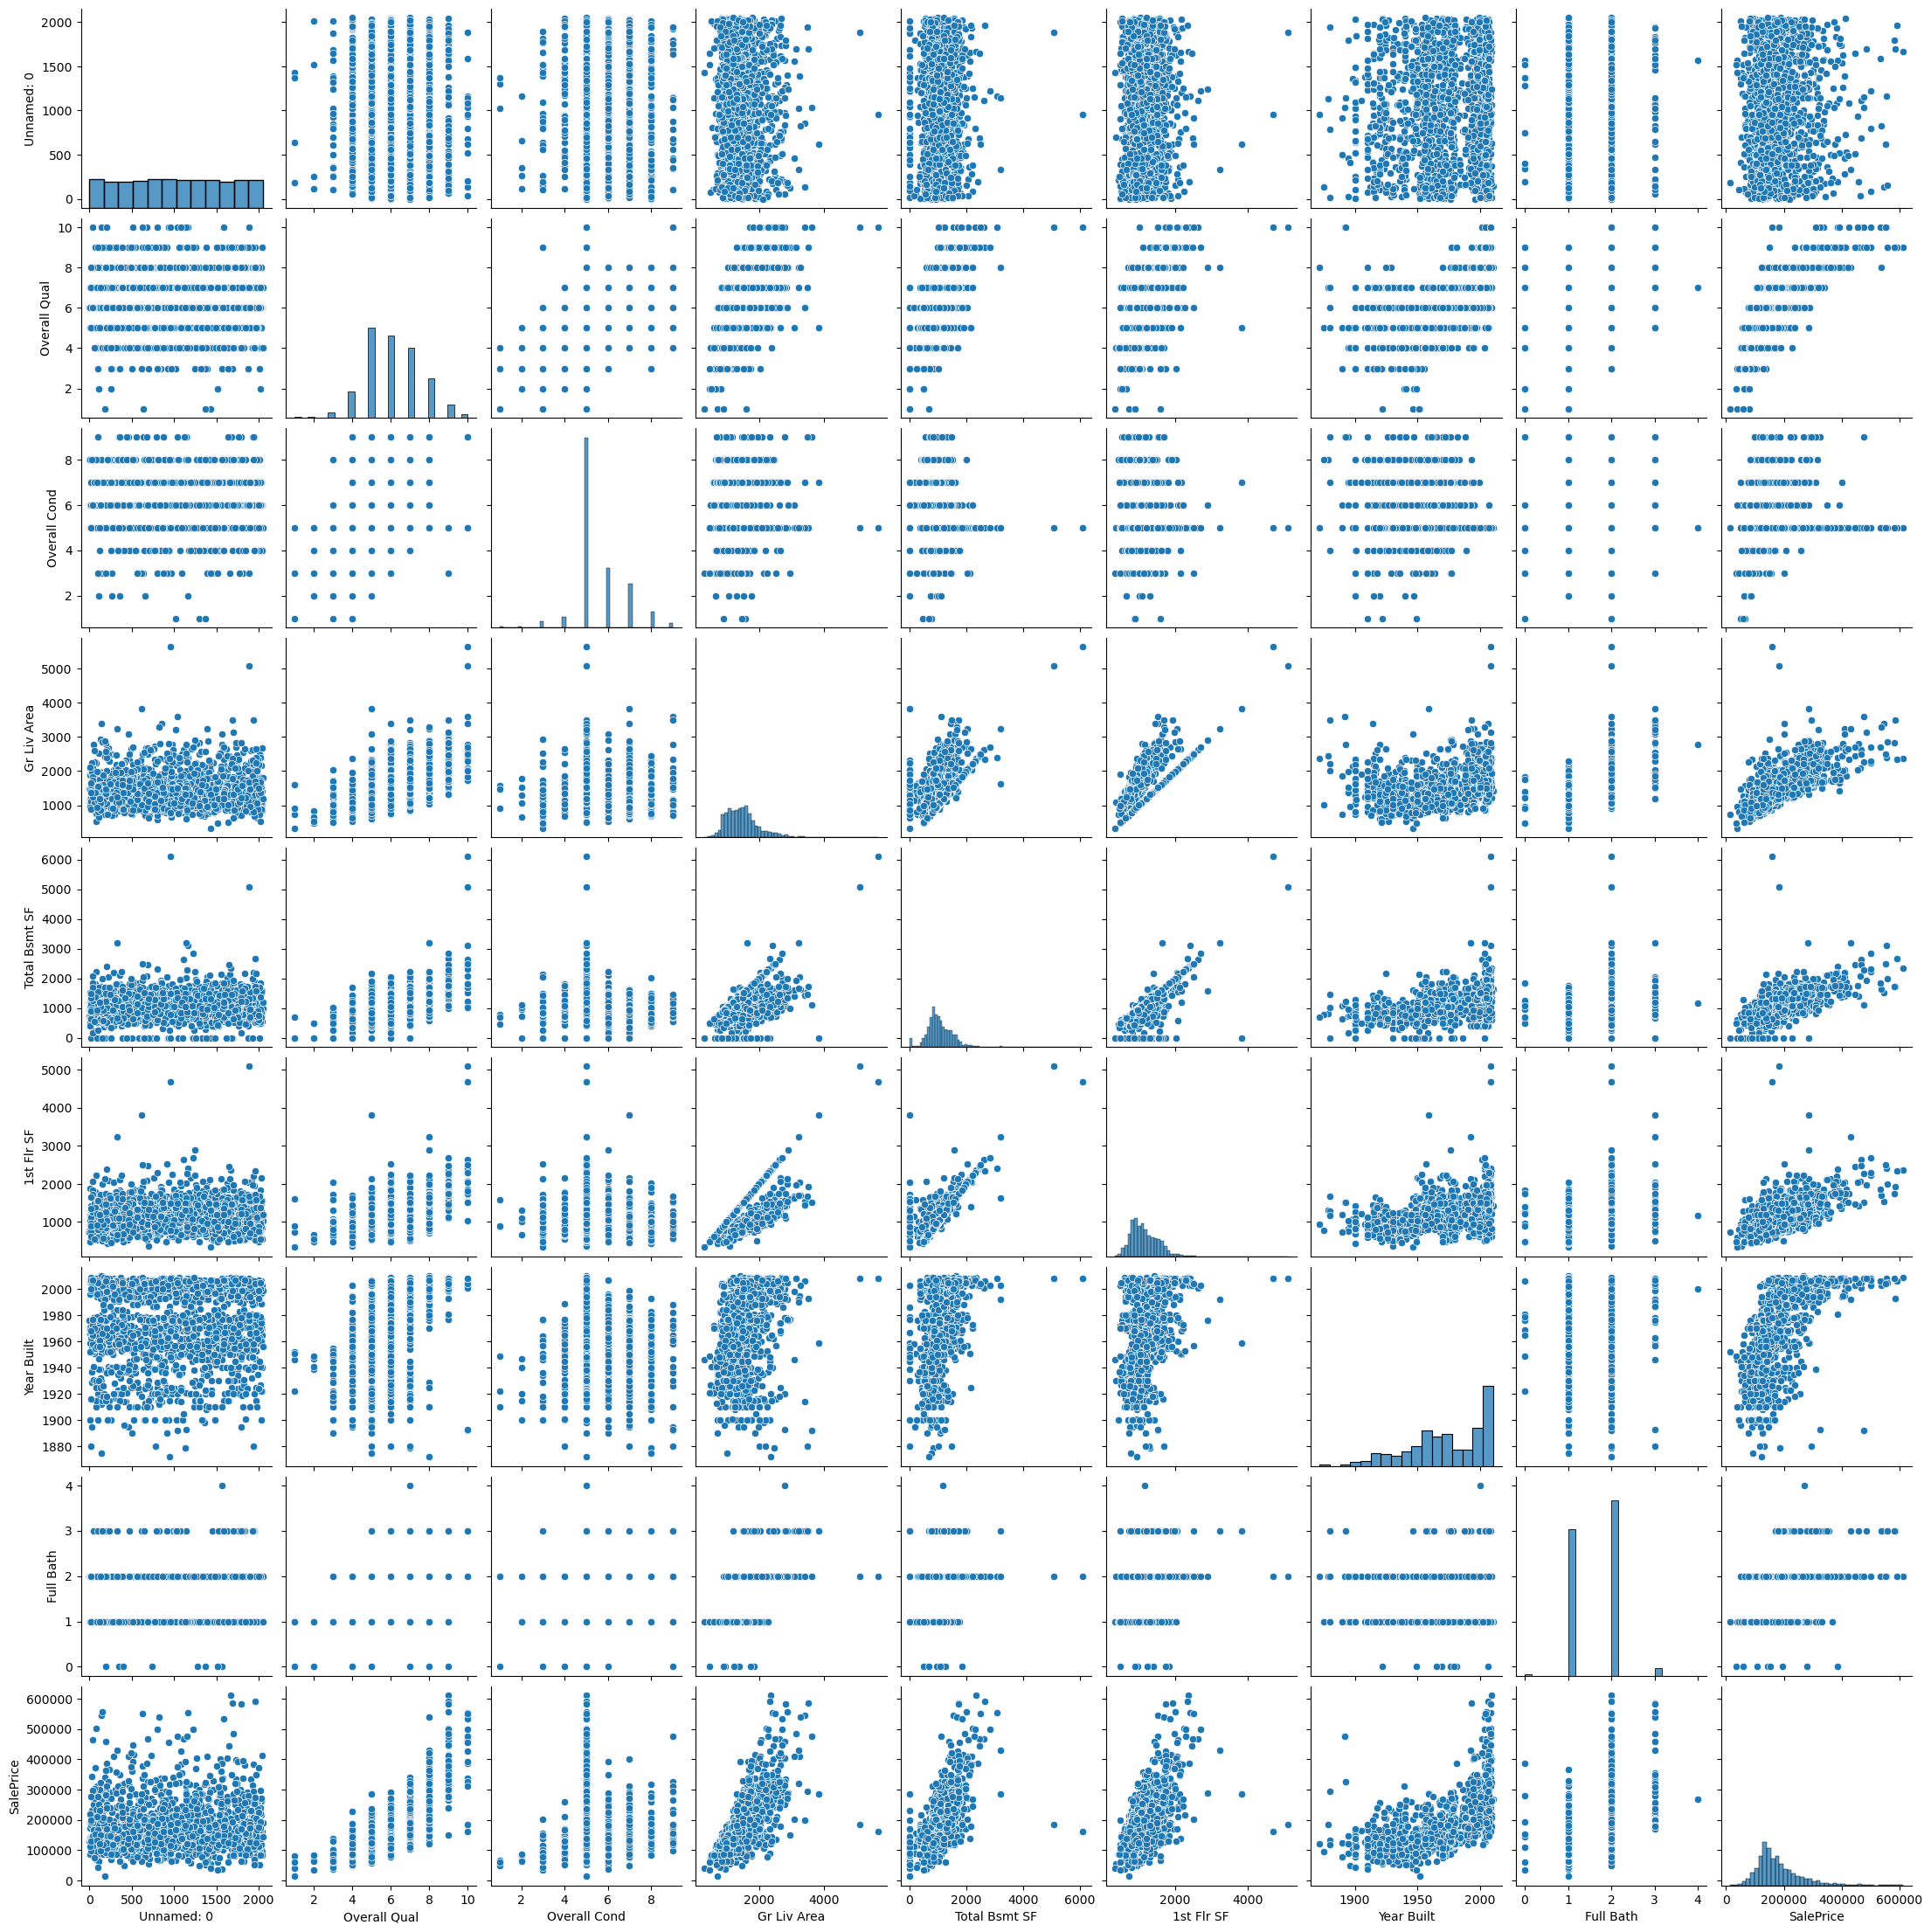

In [19]:
sns.pairplot(ames_housing);

# Preprocessing and Modeling

**Correlations between features and target, and between features**

In [20]:
numeric_columns = ames_housing.select_dtypes(include=["number"])
# correlation between numeric features and target SalePrice
correlations = numeric_columns.corr()['SalePrice'].sort_values(ascending=False)
correlations

SalePrice        1.000000
Overall Qual     0.795815
Gr Liv Area      0.691599
Total Bsmt SF    0.613024
1st Flr SF       0.600088
Year Built       0.561116
Full Bath        0.534629
Unnamed: 0       0.017101
Overall Cond    -0.093388
Name: SalePrice, dtype: float64

Only keep features with correlation >= 0.4 with the target `SalePrice`

In [21]:
features_corr = correlations[(correlations >= 0.4) & (correlations.index != 'SalePrice')].index
features_corr

Index(['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF',
       'Year Built', 'Full Bath'],
      dtype='object')

In [22]:
to_drop = correlations[(correlations < 0.4) & (correlations.index != 'SalePrice')].index
ames_housing.drop(columns=to_drop, inplace=True)

In [23]:
corr_housing = ames_housing[features_corr].corr()
corr_housing

,Overall Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath
Overall Qual,1.000000,0.564776,0.544801,0.468386,0.591314,0.513929
Gr Liv Area,0.564776,1.000000,0.464161,0.575936,0.252323,0.605949
Total Bsmt SF,0.544801,0.464161,1.000000,0.810424,0.403999,0.319125
1st Flr SF,0.468386,0.575936,0.810424,1.000000,0.315015,0.362900
Year Built,0.591314,0.252323,0.403999,0.315015,1.000000,0.481132
Full Bath,0.513929,0.605949,0.319125,0.362900,0.481132,1.000000


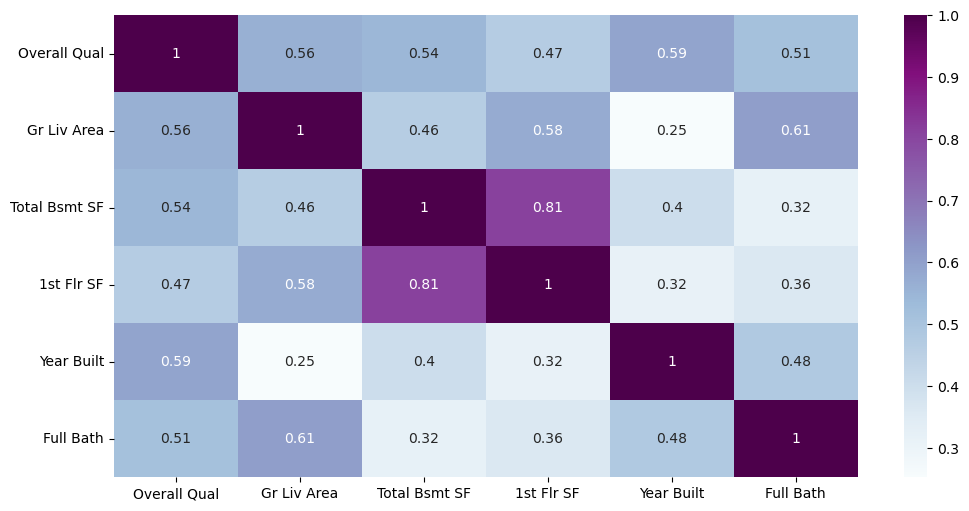

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_housing, annot=True, cmap="BuPu");

In [25]:
ames_housing.columns

Index(['Overall Qual', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'Street',
       '1st Flr SF', 'Year Built', 'Full Bath', 'SalePrice'],
      dtype='object')

In [26]:
# list for pairs of highly correlated features
high_corr_pairs = []

# find pairs with correlation >= 0.8
for i in range(len(corr_housing.columns)):
    for j in range(i+1, len(corr_housing.columns)):
        if abs(corr_housing.iloc[i, j]) >= 0.7:
            high_corr_pairs.append((corr_housing.columns[i], corr_housing.columns[j]))

high_corr_pairs

[('Total Bsmt SF', '1st Flr SF')]

### Addressing Multicollinearity 

The goal here is to keep features that are correlated with the target but uncorrelated among each other. It can be observed here one pair `('Total Bsmt SF', '1st Flr SF')` have a strong positive correlation between features. '`Total Bsmt SF`' have a correlation of 0.613 with the target, and '`1st Flr SF`' have a correlation of 0.60 with the target, even thought there is no significant difference in value, I keep the feature '`Total Bsmt SF`' since it has a correlation slightly higher.

In [27]:
# drop 1st Flr SF
ames_housing.drop(columns=['1st Flr SF'], inplace=True) # 1

In [28]:
ames_housing.head()

,Overall Qual,Gr Liv Area,Central Air,Total Bsmt SF,Street,Year Built,Full Bath,SalePrice
0,6,1587,Y,1587.0,Pave,1971,2,167300
1,7,2267,Y,1005.0,Pave,1937,1,219000
2,5,864,Y,864.0,Pave,1950,1,129000
3,7,2260,Y,1306.0,Pave,1996,2,328000
4,8,2501,Y,1242.0,Pave,1995,2,290000


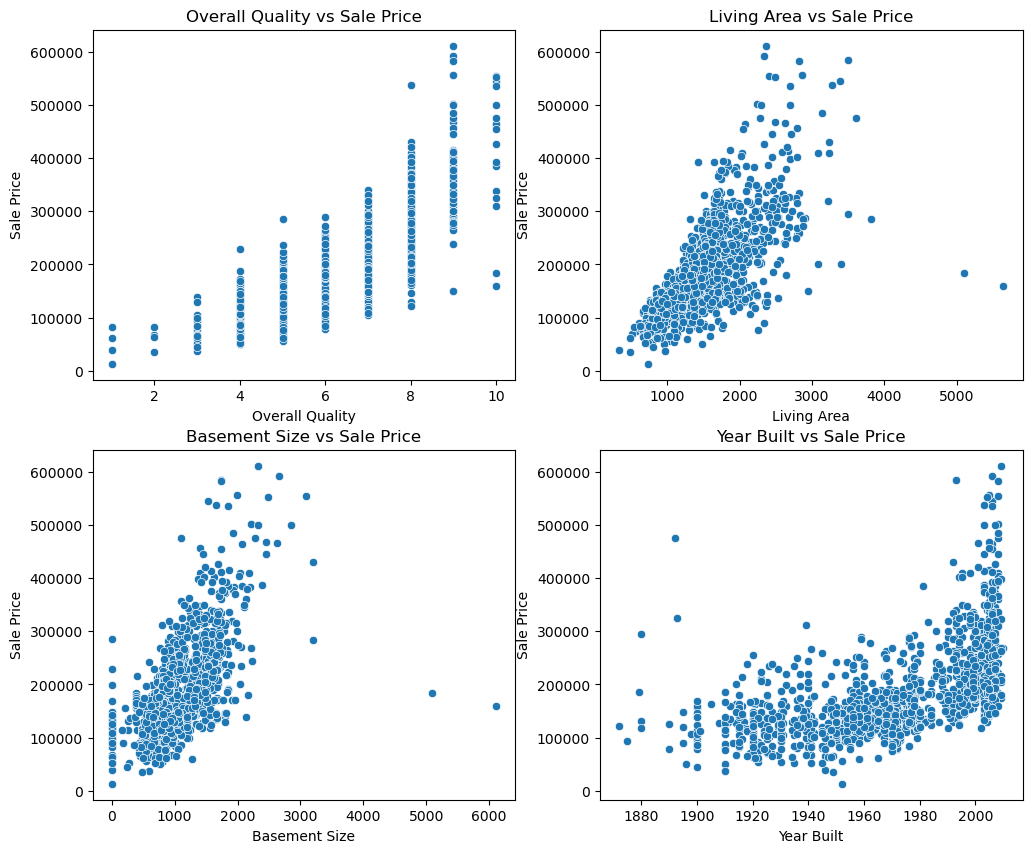

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Overall Quality vs Sale Price
sns.scatterplot(data=ames_housing, x='Overall Qual', y='SalePrice', ax=axes[0, 0])
axes[0, 0].set_title('Overall Quality vs Sale Price')
axes[0, 0].set_xlabel('Overall Quality')
axes[0, 0].set_ylabel('Sale Price')

# Living Area vs Sale Price
sns.scatterplot(data=ames_housing, x='Gr Liv Area', y='SalePrice', ax=axes[0, 1])
axes[0, 1].set_title('Living Area vs Sale Price')
axes[0, 1].set_xlabel('Living Area')
axes[0, 1].set_ylabel('Sale Price')

# Basement Size vs Sale Price
sns.scatterplot(data=ames_housing, x='Total Bsmt SF', y='SalePrice', ax=axes[1, 0])
axes[1, 0].set_title('Basement Size vs Sale Price')
axes[1, 0].set_xlabel('Basement Size')
axes[1, 0].set_ylabel('Sale Price')

# Year Built vs Sale Price
sns.scatterplot(data=ames_housing, x='Year Built', y='SalePrice', ax=axes[1, 1])
axes[1, 1].set_title('Year Built vs Sale Price')
axes[1, 1].set_xlabel('Year Built')
axes[1, 1].set_ylabel('Sale Price');

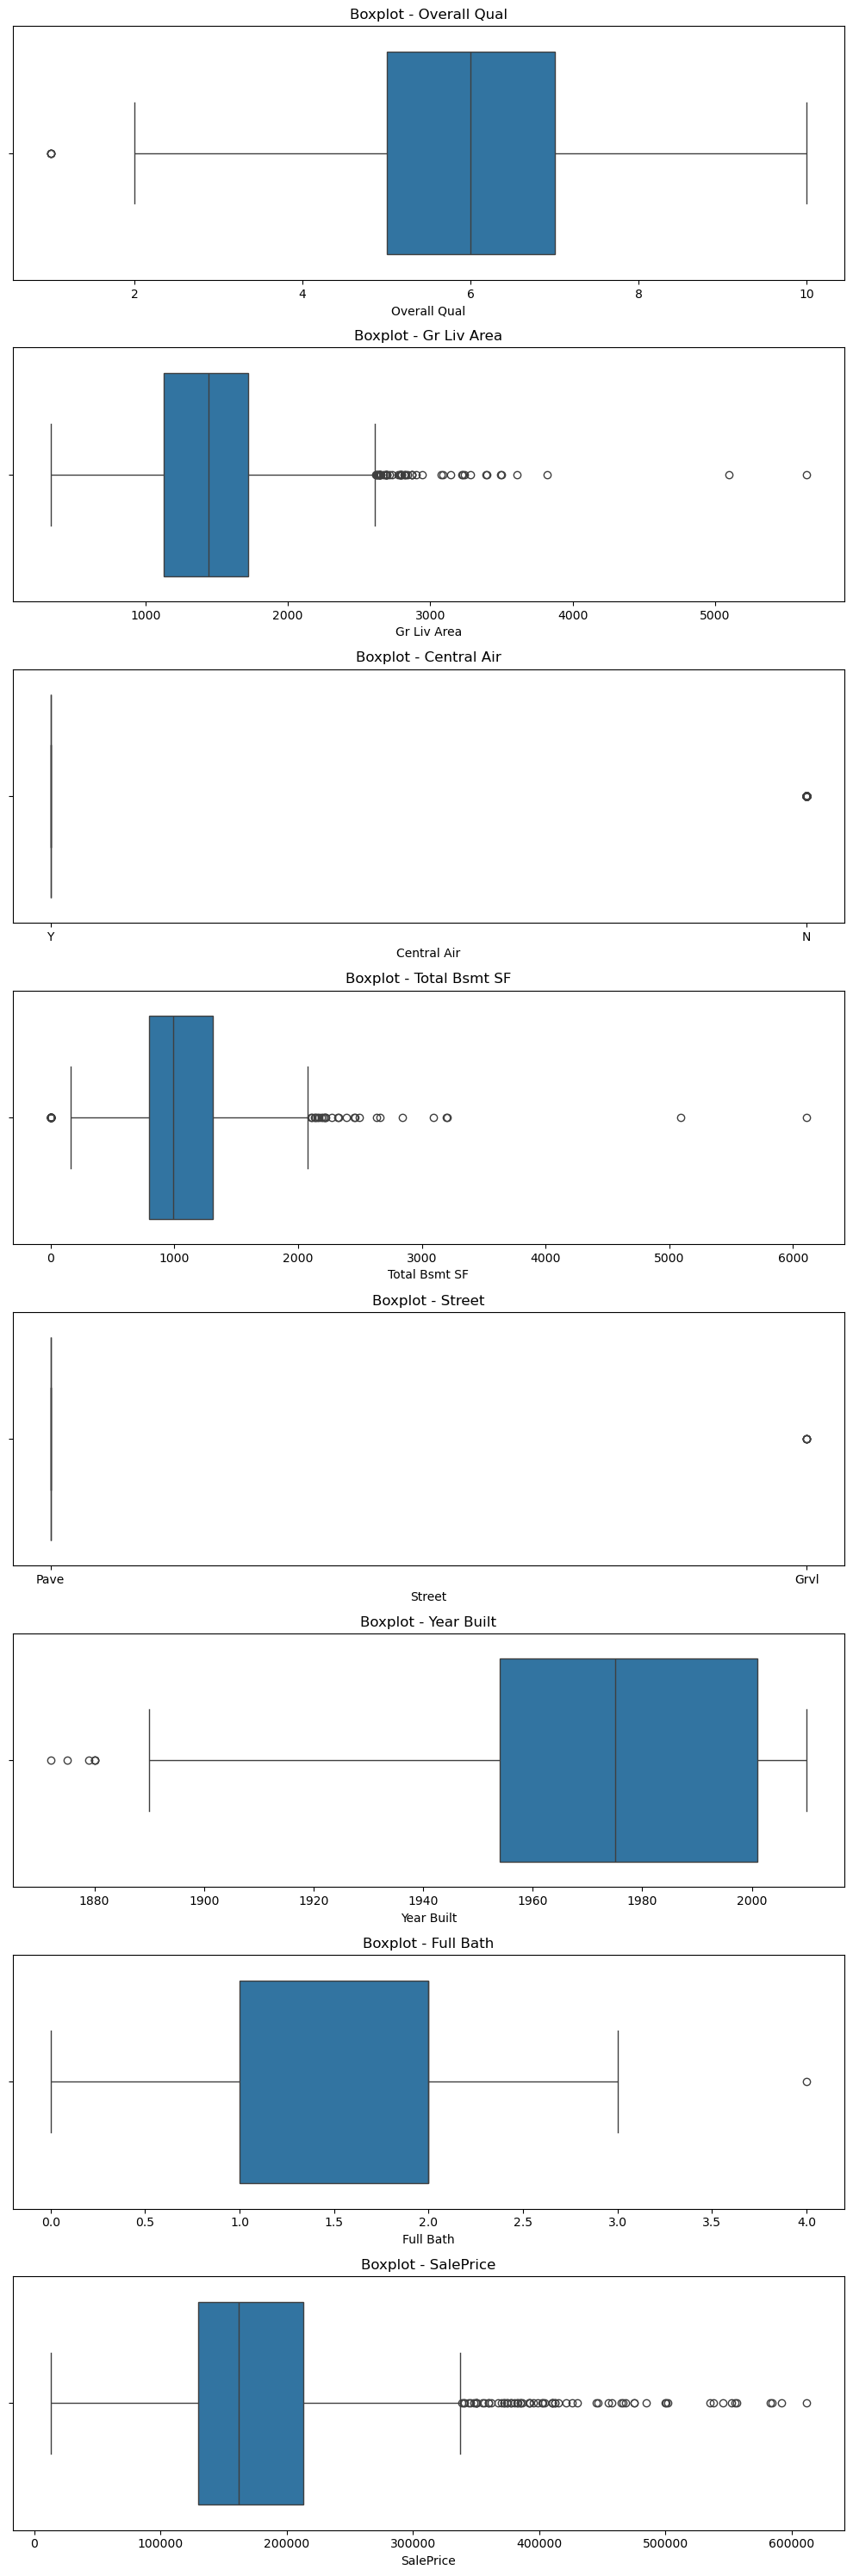

In [30]:
# check for outliers  
fig, axes = plt.subplots(nrows=len(ames_housing.columns), figsize=(10, 30)) 

for i, column in enumerate(ames_housing.columns):
    sns.boxplot(x=ames_housing[column], ax=axes[i])
    axes[i].set_title(f'Boxplot - {column}')
    axes[i].set_xlabel(column)

plt.tight_layout();

From the boxplot outliers are identified in the following variables: `'Total Bsmt SF' (`**Total square feet of basement area**), `'Gr Liv Area'` (**Above ground living area square feet**), `'Full Bath', 'SalePrice'`

Remove outliers or extreme values from selected columns in the dataset for data to be representative so that later the model is less affected by outliers.

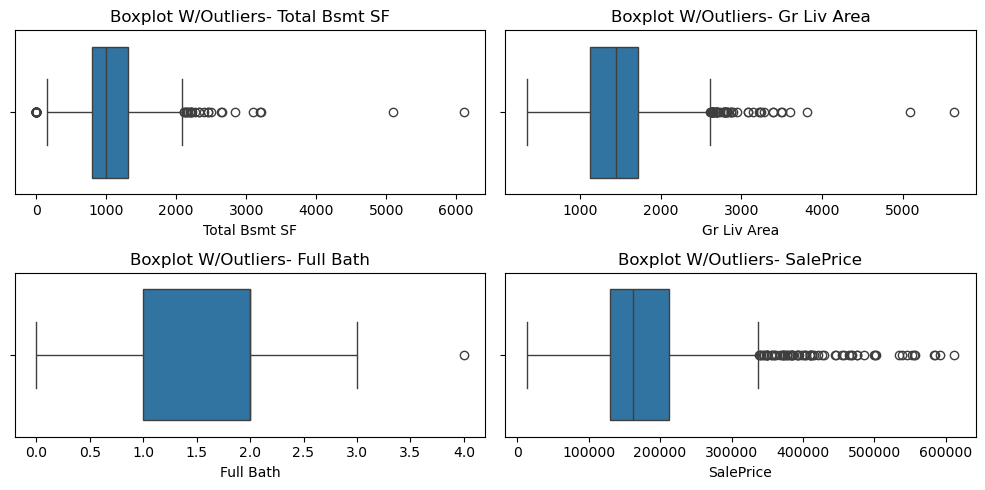

In [31]:
# plot for slides presentations
x = ['Total Bsmt SF','Gr Liv Area', 'Full Bath', 'SalePrice']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10
                                                    , 5))
for i, column in enumerate(x):
    sns.boxplot(x=ames_housing[column], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot W/Outliers- {column}')
    axes[i//2, i%2].set_xlabel(column)

plt.tight_layout()
plt.show();

In [32]:
ames_housing.shape   

(1538, 8)

In [33]:
trimmer = OutlierTrimmer(
    variables=['Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 'SalePrice'],
    capping_method="iqr",
    tail="both",
    fold=1.5
)
trimmer.fit(ames_housing[:-1])

OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both',
               variables=['Total Bsmt SF', 'Gr Liv Area', 'Full Bath',
                          'SalePrice'])

Lower limit values that indicate the outliers in the data:

In [34]:
trimmer.left_tail_caps_

{'Total Bsmt SF': 16.0,
 'Gr Liv Area': 233.5,
 'Full Bath': -0.5,
 'SalePrice': 5250.0}

Upper limit values that indicate the outliers in the data:

In [35]:
trimmer.right_tail_caps_

{'Total Bsmt SF': 2088.0,
 'Gr Liv Area': 2613.5,
 'Full Bath': 3.5,
 'SalePrice': 337650.0}

In [36]:
ames_housing = trimmer.transform(ames_housing) # tranform the dataset and target
ames_housing.shape

(1395, 8)

After removing outliers, we go from 1538 row sample of data to 1395. `143` records were removed, which represent approximately `9.3%` of dataset.

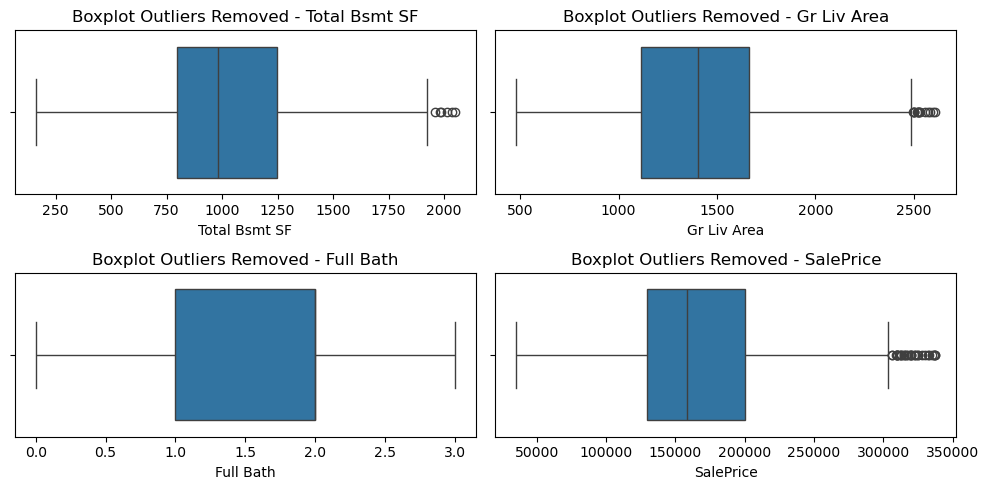

In [37]:
# plot for slide presentation
x = ['Total Bsmt SF','Gr Liv Area', 'Full Bath', 'SalePrice']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10
                                                    , 5))
for i, column in enumerate(x):
    sns.boxplot(x=ames_housing[column], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot Outliers Removed - {column}')
    axes[i//2, i%2].set_xlabel(column)

plt.tight_layout()
plt.show();

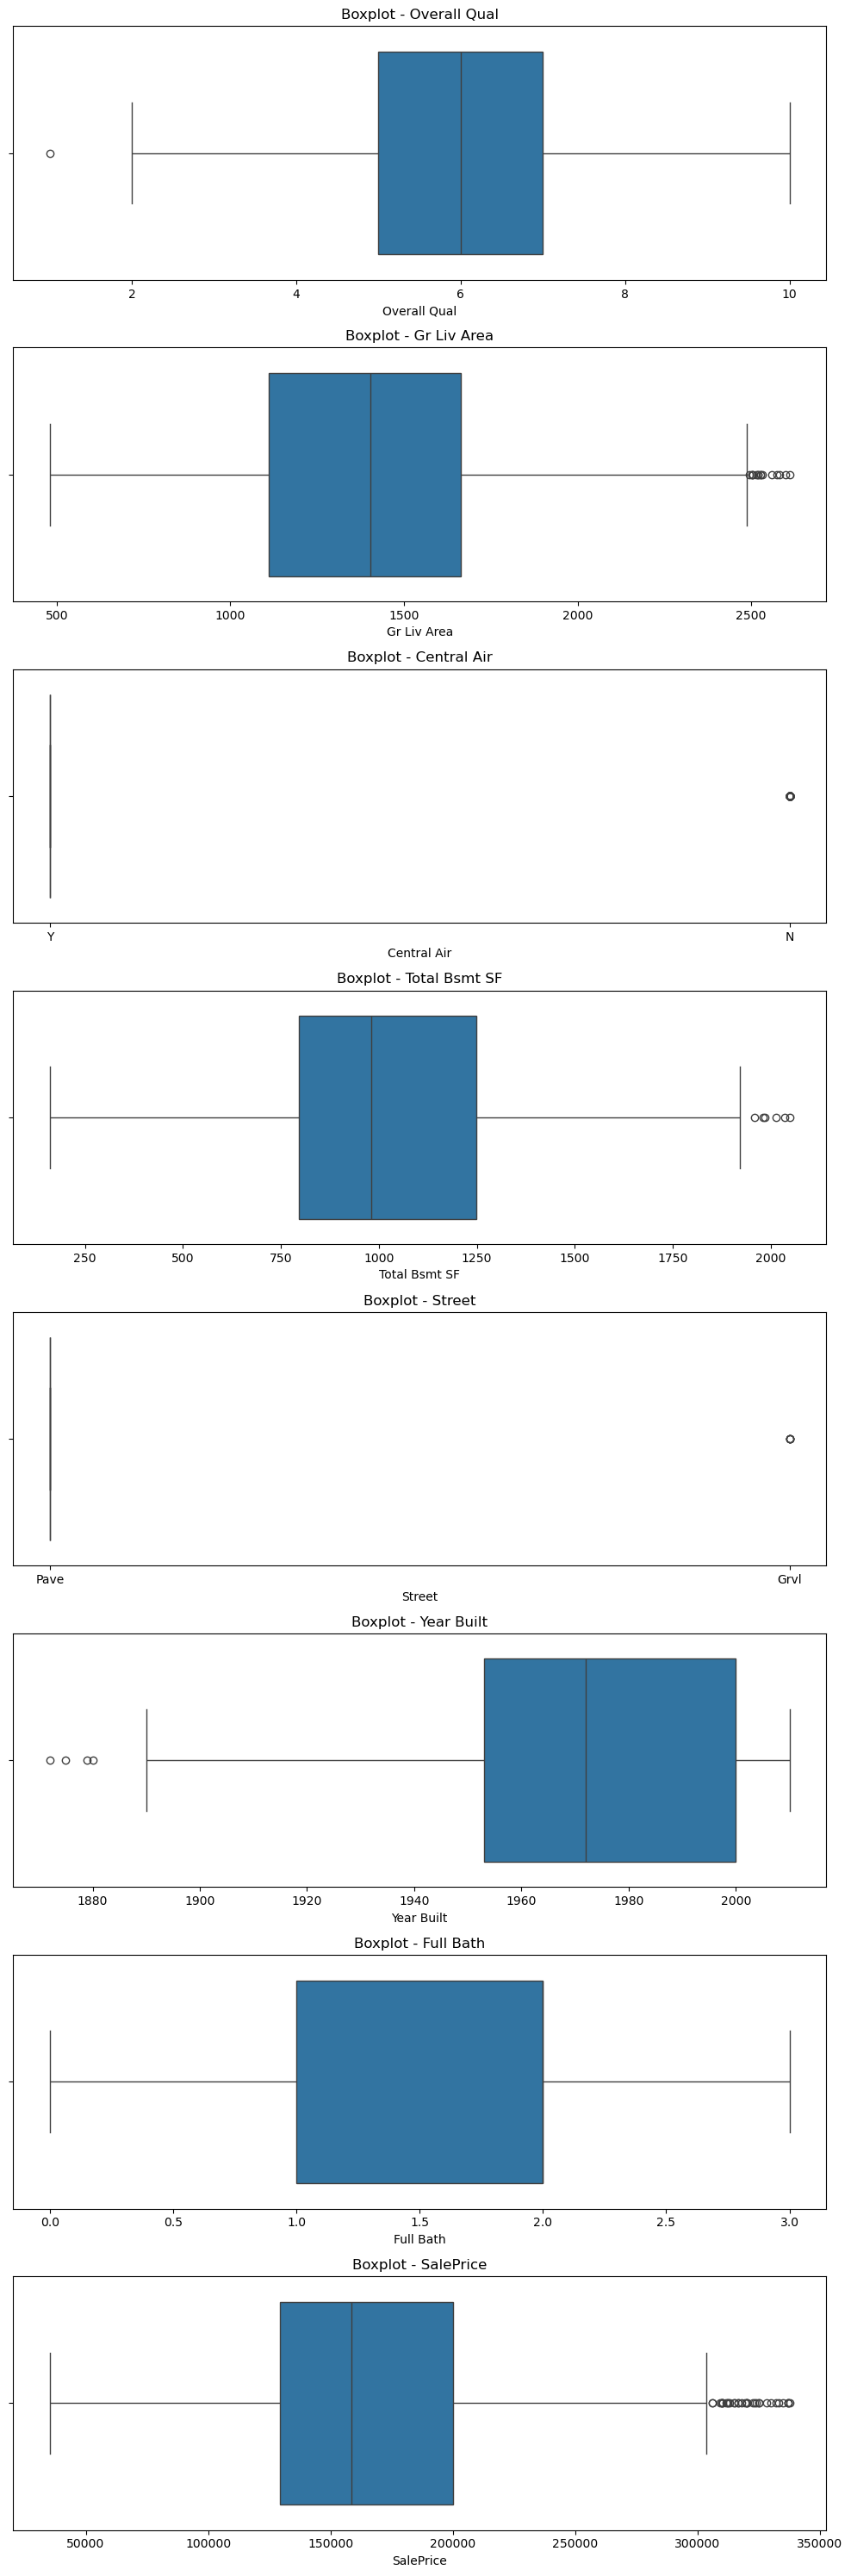

In [38]:
# Check for outliers after removing outliers
fig, axes = plt.subplots(nrows=len(ames_housing.columns), figsize=(10, 30)) 

for i, column in enumerate(ames_housing.columns):
    sns.boxplot(x=ames_housing[column], ax=axes[i])
    axes[i].set_title(f'Boxplot - {column}')
    axes[i].set_xlabel(column)

plt.tight_layout();

In [39]:
skewness = ames_housing.select_dtypes(include="number").skew()

print(skewness)
print("========================================================================")
# Conclude based on skewness values
for column, skew_val in skewness.items():
    if skew_val > 0:
        print(f"The skewness of column '{column}' is {skew_val:.3f}: right-skewed.")
    elif skew_val < 0:
        print(f"The skewness of column '{column}' is {skew_val:.3f}: left-skewed.")
    else:
        print(f"The skewness of column '{column}' is {skew_val:.3f}: symmetric.")

Overall Qual     0.091776
Gr Liv Area      0.454224
Total Bsmt SF    0.426892
Year Built      -0.579326
Full Bath        0.039918
SalePrice        0.678667
dtype: float64
The skewness of column 'Overall Qual' is 0.092: right-skewed.
The skewness of column 'Gr Liv Area' is 0.454: right-skewed.
The skewness of column 'Total Bsmt SF' is 0.427: right-skewed.
The skewness of column 'Year Built' is -0.579: left-skewed.
The skewness of column 'Full Bath' is 0.040: right-skewed.
The skewness of column 'SalePrice' is 0.679: right-skewed.


**Skewness before removing outliers**
```
Overall Qual     0.156225

Overall Cond     0.617917

Gr Liv Area      1.404508

Total Bsmt SF    1.732849

1st Flr SF       1.855983

Year Built      -0.637051

Full Bath        0.093488

SalePrice        1.675145
```
Before removing outliers, some variables like 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', and 'SalePrice' were heavily skewed, this shows that their distributions were significantly asymmetric.

After removing outliers, the skewness of these variables reduced, this shows that their distributions became more symmetric and closer to a normal distribution, which is prefered for statistical analyses.


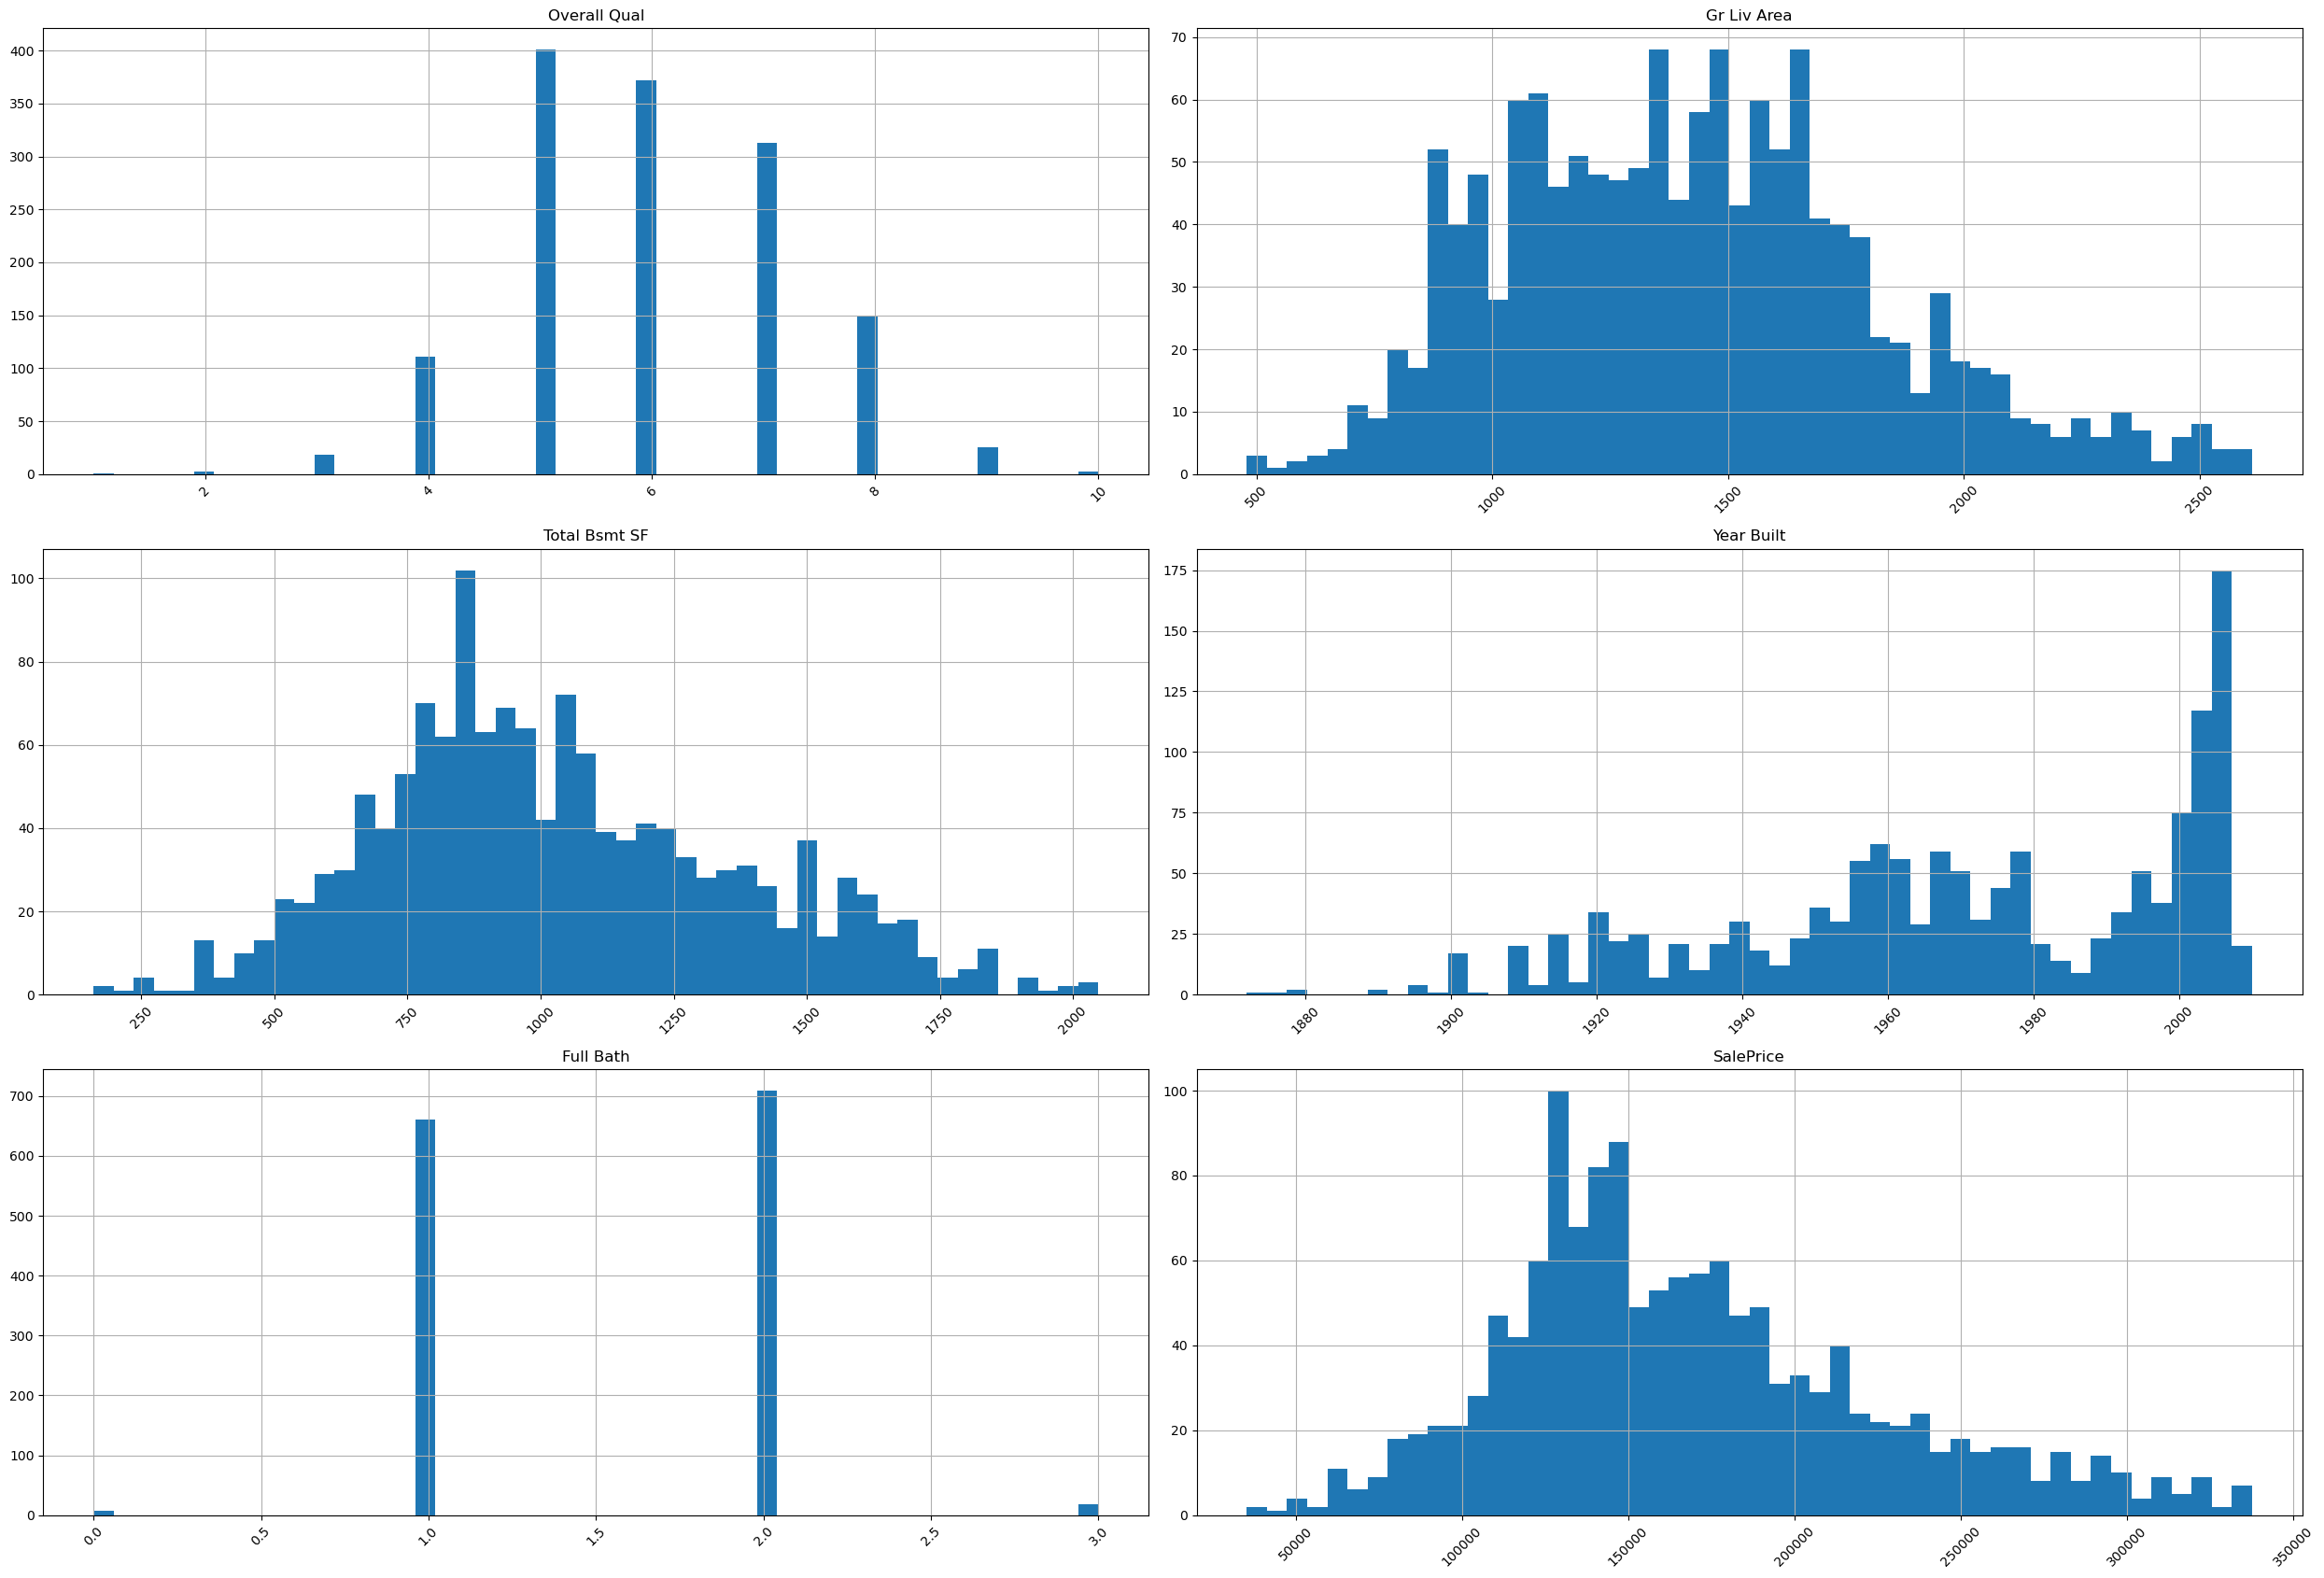

In [40]:
# distributions of features after removing outliers
axes = ames_housing.hist(bins=50, figsize=(25,17))

for ax in axes.flatten():
    ax.tick_params(axis="x", rotation=45)
    ax.figure.tight_layout();

In [41]:
# split data into features X and target y
X = ames_housing.drop(columns=["SalePrice"])
y = ames_housing["SalePrice"]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=22)

**Visualize original and transformed sale prices after applying logarithmic transformation to visualise in logarithmic scale**

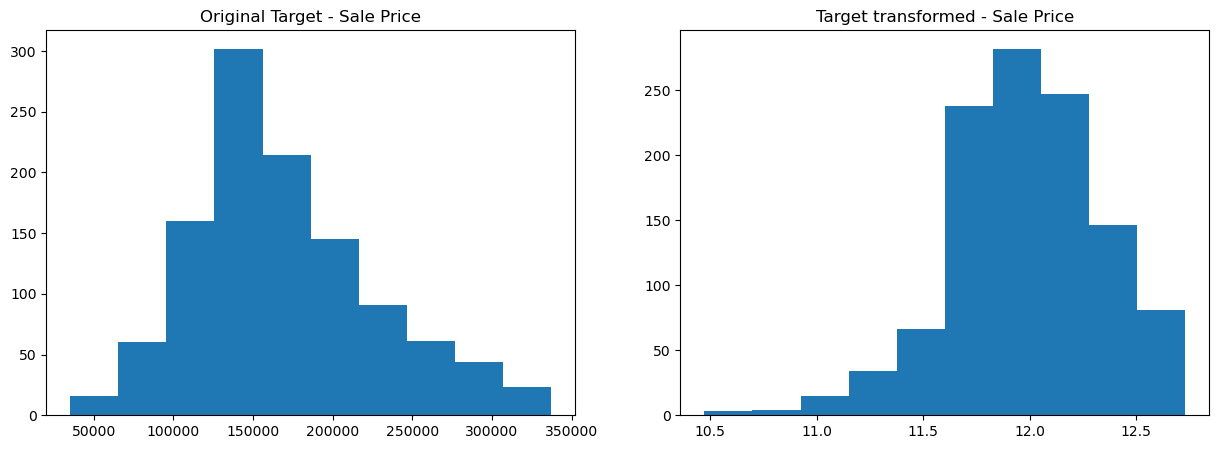

In [42]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(y_train)
ax[0].set_title('Original Target - Sale Price')

ax[1].hist(np.log(y_train))
ax[1].set_title("Target transformed - Sale Price");

**After removing outliers of the distribution of the (original) target is closer to normal**

## Ridge Model

In [43]:
# Ref:
# https://git.generalassemb.ly/adobe-dsb-3-4/306-Pipelines-Gridsearch/blob/main/pipeline_starter-clean.ipynb
# https://git.generalassemb.ly/adobe-dsb-3-4/306-Pipelines-Gridsearch/blob/main/gs_starter-clean.ipynb
# https://medium.com/@kelvinsang97/machine-learning-pipeline-transformer-3e962917e8fc

# list of columns for numeric and categorical features
numeric_columns = [col for col in X.columns if X[col].dtype in ["int64", "float64"]]
categorical_columns=[col for col in X.columns if X[col].dtype == 'object']

# transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('polys', PolynomialFeatures()),  # Apply polynomial features only to numeric columns
    ('scaler', StandardScaler())
])

 
# transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown="ignore")),
    ('scaler', StandardScaler(with_mean=False))
])

# transformer for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Define model
model = TransformedTargetRegressor(Ridge(), func=np.log, inverse_func=np.exp)
# model = Ridge()

# Create pipeline
ridge_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ('model', model)   
])

# Fit pipeline to training data
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('polys',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Overall Qual',
                                                   'Gr Liv Area',
                                                   'Total Bsmt SF',
                                                   'Year Built', 'Full Bath']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['Central Air', 'Street'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=Ridge()))])

In [44]:
import warnings
warnings.filterwarnings("ignore", message="Found unknown categories", category=UserWarning) # ignore warnings

# parameters grid for grid search
params = {
    'preprocessor__num__polys__degree': [1, 2, 3],   
    'model__regressor__alpha': np.logspace(0, 3)   
}


# grid search with cross-validation
grid = GridSearchCV(estimator=ridge_pipe, param_grid=params, cv=5, scoring="neg_mean_squared_error")

# fit grid search CV to the transformed training data
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('polys',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Overall '
                                                                          'Qual',
                                                                          'Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          'Year '
                                                                          'Built',
                                                                          'Full '
                                                                          'Bath']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore')),
                                                                                         ('scaler...
         29.47051703,   33.93221772,   39.06939937,   44.98432669,
         51.79474679,   59.63623317,   68.6648845 ,   79.06043211,
         91.0298178 ,  104.81131342,  120.67926406,  138.94954944,
        159.98587196,  184.20699693,  212.09508879,  244.20530945,
        281.1768698 ,  323.74575428,  372.75937203,  429.19342601,
        494.17133613,  568.9866029 ,  655.12855686,  754.31200634,
        868.51137375, 1000.        ]),
                         'preprocessor__num__polys__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [45]:
grid.best_params_

{'model__regressor__alpha': 1.0, 'preprocessor__num__polys__degree': 3}

In [46]:
# best parameters in grid search CV
best_params_ridge = grid.best_params_

# new pipeline with the best parameters
best_ridge = Pipeline([
    ("preprocessor", preprocessor),
    ('model', TransformedTargetRegressor(Ridge(alpha=best_params_ridge['model__regressor__alpha']),
                                          func=np.log, inverse_func=np.exp))
])

# fit pipeline with best parameters to training sets
best_ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('polys',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Overall Qual',
                                                   'Gr Liv Area',
                                                   'Total Bsmt SF',
                                                   'Year Built', 'Full Bath']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['Central Air', 'Street'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=Ridge()))])

## Lasso Model

In [47]:
# Lasso
model_lasso = TransformedTargetRegressor(Lasso(), func=np.log, inverse_func=np.exp)


# Create pipeline
lasso_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ('model', model_lasso)   
])

# Fit pipeline to training data
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('polys',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Overall Qual',
                                                   'Gr Liv Area',
                                                   'Total Bsmt SF',
                                                   'Year Built', 'Full Bath']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['Central Air', 'Street'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=Lasso()))])

In [48]:
import warnings
warnings.filterwarnings("ignore", message="Found unknown categories", category=UserWarning) # ignore warnings

# same parameters grid for grid search CV as Ridge
grid_lasso = GridSearchCV(estimator=lasso_pipe, param_grid=params, cv=5, scoring="neg_mean_squared_error")

grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('polys',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Overall '
                                                                          'Qual',
                                                                          'Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          'Year '
                                                                          'Built',
                                                                          'Full '
                                                                          'Bath']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore')),
                                                                                         ('scaler...
         29.47051703,   33.93221772,   39.06939937,   44.98432669,
         51.79474679,   59.63623317,   68.6648845 ,   79.06043211,
         91.0298178 ,  104.81131342,  120.67926406,  138.94954944,
        159.98587196,  184.20699693,  212.09508879,  244.20530945,
        281.1768698 ,  323.74575428,  372.75937203,  429.19342601,
        494.17133613,  568.9866029 ,  655.12855686,  754.31200634,
        868.51137375, 1000.        ]),
                         'preprocessor__num__polys__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [49]:
grid_lasso.best_params_

{'model__regressor__alpha': 1.0, 'preprocessor__num__polys__degree': 1}

In [50]:
# best parameter for lasso grid search CV
best_params_lasso = grid_lasso.best_params_

# lasso pipeline with the best parameter
best_lasso = Pipeline([
    ("preprocessor", preprocessor),
    ('model', TransformedTargetRegressor(Lasso(alpha=best_params_lasso['model__regressor__alpha']),
                                          func=np.log, inverse_func=np.exp))
])
best_lasso.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('polys',
                                                                   PolynomialFeatures()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Overall Qual',
                                                   'Gr Liv Area',
                                                   'Total Bsmt SF',
                                                   'Year Built', 'Full Bath']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['Central Air', 'Street'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=Lasso()))])

# Evaluation and Conceptual Understanding

## Baseline Model

In [51]:
baseline_train_pred = [y_train.mean()] * len(y_train)

In [52]:
print(baseline_train_pred[:3])
len(baseline_train_pred), y_train.shape

[169333.24193548388, 169333.24193548388, 169333.24193548388]


(1116, (1116,))

This baseline prediction informs that the house sale price $169,333.24 before building any machine learning model

In [53]:
mean_squared_error(y_train, baseline_train_pred)

3266540315.468349

In [54]:
root_mean_squared_error(y_train, baseline_train_pred)

57153.655311522714

In [55]:
baseline_test_pred = [y_test.mean()] * len(y_test)

In [56]:
print(baseline_test_pred[:3])
len(baseline_test_pred), y_test.shape

[167582.9283154122, 167582.9283154122, 167582.9283154122]


(279, (279,))

In [57]:
mean_squared_error(y_test, baseline_test_pred)

3068562923.6866174

In [58]:
root_mean_squared_error(y_test, baseline_test_pred)

55394.61096249903

Baseline model predicts the average sale price of houses in the dataset for every house. Prediction in training set is `$169,333.24` and `$167,582.93`for test set, with RMSE of `57153.65` and `55394.61` respectively.

## Evaluation - Ridge Model

In [59]:
best_ridge.score(X_train, y_train)

0.8373274894467492

In [60]:
best_ridge.score(X_test, y_test)

0.8352606268549491

In [61]:
train_preds = best_ridge.predict(X_train)
test_preds = best_ridge.predict(X_test)

In [62]:
train_preds[:5] # predictions - training set

array([103709.11253415, 107845.22107925, 243684.31106455, 218837.81337689,
       130849.67595192])

In [63]:
y_train[:5] # true value - training set

988     108000
241     128000
500     207500
1116    214000
612     142100
Name: SalePrice, dtype: int64

In [64]:
test_preds[:5] # predictions - testing set

array([209785.3904507 , 229702.48588517, 159474.45224596, 218462.49958746,
       206710.96873149])

In [65]:
y_test[:5] # true value - testing set

1024    223000
45      215000
1236    210000
446     275000
921     173000
Name: SalePrice, dtype: int64

In [66]:
rmse_train = root_mean_squared_error(y_train, train_preds) # mean_squared_error(y_train, train_preds, squared=False)
print("Train - Root Mean Squared Error:", rmse_train)

Train - Root Mean Squared Error: 23051.60111447021


In [67]:
rmse_test = root_mean_squared_error(y_test, test_preds)
print("Test - Root Mean Squared Error:", rmse_test)

Test - Root Mean Squared Error: 22483.619203862138


Ridge regression model have a more accurate predictions compared to the baseline model. The Ridge model take into account features to predict house prices and learns from the data, and Ridge has a lower MSE and Root Mean Squared Error (RMSE) values on both the training and test sets.

In [68]:
# coefficients of the model 
coefficients = best_ridge.named_steps['model'].regressor_.coef_

# column names after transformation for numeric features
numeric_preprocessed_columns = best_ridge.named_steps['preprocessor'].transformers_[0][1]\
                                .named_steps['polys'].get_feature_names_out(numeric_columns)
# column names for categorical features
categorical_preprocessed_columns = best_ridge.named_steps['preprocessor'].transformers_[1][1]\
                                    .named_steps['onehot'].get_feature_names_out(categorical_columns)

preprocessed_columns = list(numeric_preprocessed_columns) + list(categorical_preprocessed_columns)
coef_ridge = pd.DataFrame(coefficients, index=preprocessed_columns, columns=['Coefficient'])

coef_ridge

,Coefficient
1,0.000000
Overall Qual,0.133689
Gr Liv Area,0.063979
Total Bsmt SF,0.017782
Year Built,0.042381
Full Bath,-0.020545
Overall Qual^2,-0.147143
Overall Qual Gr Liv Area,0.205539
Overall Qual Total Bsmt SF,0.065101
Overall Qual Year Built,0.033987


coefficients represent the influence of each feature on the predicted house for the Ridge regression model. `Overall material and finish Quality`, `Above ground living area square feet`, `Total square feet of basement area`, and `Original construction date` has the strongest influence on the `Sale Price` of houses.

In [69]:
from scipy import stats

$$ \text{Squared Error} = \sum (y_i - \hat{y}_i)^2 $$

In [70]:
# Ref.: https://henryiii.github.io/compclass/week9/1_confidence_intervals.html
squared_errors = (y_test-test_preds)**2
np.sqrt(stats.t.interval(0.95, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([19965.76454415, 24746.60605368])

Predictions of the ridge on the test set are expected to have a Root Mean Squared Error (RMSE) within the range of approximately 19965.76 to 24746.61, with 95% confidence. This interval gives us an idea of the likely accuracy of the model's predictions on unseen data.

We can be 95% confident that the true RMSE of the Ridge model's predictions falls in this range. Lower values shows better model performance. A narrow range of the interval shows a more precise estimation of the model on unseen data.

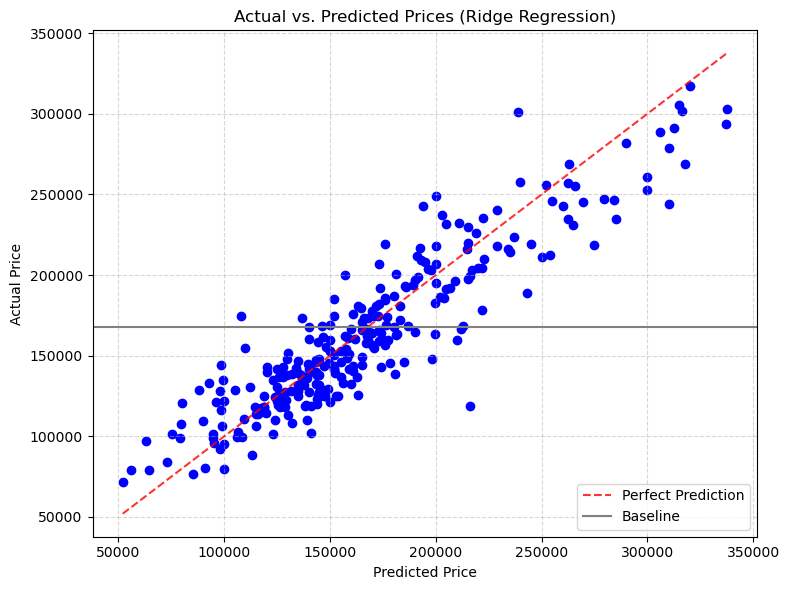

In [71]:
# Ref. for plt.plot: https://www.educative.io/answers/linear-regression-using-scikit-learn
plt.figure(figsize=(8, 6))
plt.scatter(y_test,test_preds, c='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', alpha=0.8, label='Perfect Prediction')
plt.axhline(baseline_test_pred[0], color='grey', label='Baseline')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual vs. Predicted Prices (Ridge Regression)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Evaluation - Lasso Model

In [72]:
best_lasso.score(X_train, y_train)

-0.027762763473190954

In [73]:
best_lasso.score(X_test, y_test)

-0.019688431175592935

In [74]:
train_preds_lasso = best_lasso.predict(X_train)
test_preds_lasso = best_lasso.predict(X_test)

In [75]:
rmse_train = root_mean_squared_error(y_train, train_preds_lasso)# mean_squared_error(y_train, train_preds, squared=False)
print("Train - Root Mean Squared Error:", rmse_train)

Train - Root Mean Squared Error: 57941.5956081841


In [76]:
rmse_test = root_mean_squared_error(y_test, test_preds_lasso)
print("Test - Root Mean Squared Error:", rmse_test)

Test - Root Mean Squared Error: 55937.269450855376


In [77]:
# coefficients of the model 
coefficients_lasso = best_lasso.named_steps['model'].regressor_.coef_

numeric_preprocessed_columns = best_lasso.named_steps['preprocessor'].transformers_[0][1]\
                                .named_steps['polys'].get_feature_names_out(numeric_columns)
categorical_preprocessed_columns = best_lasso.named_steps['preprocessor'].transformers_[1][1]\
                                    .named_steps['onehot'].get_feature_names_out(categorical_columns)

preprocessed_columns = list(numeric_preprocessed_columns) + list(categorical_preprocessed_columns)
coef_lasso = pd.DataFrame(coefficients_lasso, index=preprocessed_columns, columns=['Coefficient'])

coef_lasso

,Coefficient
1,0.0
Overall Qual,0.0
Gr Liv Area,0.0
Total Bsmt SF,0.0
Year Built,0.0
Full Bath,0.0
Overall Qual^2,0.0
Overall Qual Gr Liv Area,0.0
Overall Qual Total Bsmt SF,0.0
Overall Qual Year Built,0.0


In [78]:
squared_errors = (y_test-test_preds_lasso)**2
np.sqrt(stats.t.interval(0.95, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([49784.1192325 , 61477.61950076])

- For the Lasso model the **R^2** score on the training set is ~-0.03, and -0.02 on the test set. This shows that the model predictions do not fit the data well.

- The Root Mean Squared Error (RMSE) on the training set is ~ 57941.60, and ~ 55937.27 on the test set which are closer to the baseline model. This shows that the average error in the model's predictions is high.

- The coefficients for the features show that all the features are zero, and this means the features are not contributing to the predictions.

The 95% confidence interval for the RMSE on the test set is ~ `(49784.12, 61477.62)`. This wide range shows a considerable uncertainty in the accuracy of the model prediction

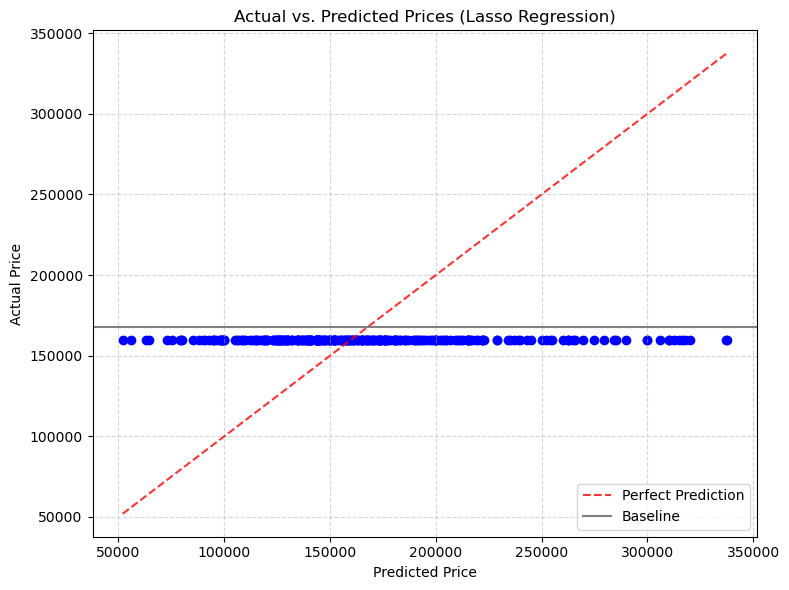

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,test_preds_lasso, c='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', alpha=0.8, label='Perfect Prediction')
plt.axhline(baseline_test_pred[0], color='grey', label='Baseline')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual vs. Predicted Prices (Lasso Regression)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Conclusion and Recommendations

## Conclusions

* Features like overall quality, living area, and basement size significantly influence house prices in Ames, Iowa.
* The ridge regression model performs better than the baseline and lasso model, and it provides a more accurate predictions with lower mean squared error (MSE) and root mean squared error (RMSE) values.
* The lasso regression model have poor performance, and it shows that the selected features do not contribute to predictions.
* The model's accuracy in Ames, Iowa may not apply universally because of different housing market factors and demographics in different area. For model to perform well for different cities, it is important to collect more data from different cities and areas.

## Recommendations
* Homeowners should focus on improving overall quality and living space to increase property values.
* Buyers should prioritize properties with desirable features such as spacious living areas and modern amenities
* Real estate professionals can use the predictive model to offer accurate pricing estimates, and this will help with informed decision-making in the housing market.

# Prediction on test.csv for Submission

In [80]:
test = pd.read_csv('./datasets/test.csv')
test.head(2)

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,1124,2782,907200170,80,RL,55.0,10780,Pave,NaN,IR1,...,0,0,0,NaN,NaN,NaN,0,7,2006,WD
1,188,2569,535125060,60,RL,88.0,14200,Pave,NaN,Reg,...,0,0,0,NaN,GdPrv,NaN,0,5,2006,WD


In [81]:
Unnamed_cols = test["Unnamed: 0"].values

test = test[ames_housing.columns[:-1]]

preds = best_ridge.predict(test) # Prediction with the best model - Ridge
preds[:10]

array([125949.01332027, 216209.96403535, 263224.02666163, 130504.24655237,
       208588.48203652, 311986.97484627, 157873.62128885, 269835.40809691,
       150324.51376748,  92041.75011339])

In [82]:
test["SalePrice"] = preds
lr_submission = pd.DataFrame({'Unnamed: 0': Unnamed_cols, 'SalePrice': preds}).set_index('Unnamed: 0')
lr_submission.to_csv('lr_submission.csv')
lr_submission.head()

,SalePrice
Unnamed: 0,
1124,125949.013320
188,216209.964035
1727,263224.026662
1658,130504.246552
1424,208588.482037
